In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Path to your CSV file
file_path = 'data_simulation.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Dropping columns that are not useful for the prediction
df.drop(columns=['NOME', 'COGNOME', 'TELEFONO', 'CELLULARE', 'EMAIL', 'COMUNE', 'CAP', 'INDIRIZZO', 'CODICE_FISCALE', 'IBAN', 'COMUNE_NASCITA', 'NOME_AZIENDA', 'TIPO_AZIENDA', 'CODICE_FISCALE_AZIENDA', 'PARTITA_IVA_AZIENDA', 
                 'DOCUMENTAZIONE_PENSIONATO'], inplace=True)
print(df)
	 	  		

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Sample data
data = {
    'NOME': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Hannah', 'Ivy', 'Jack', 'Karen', 'Leo', 'Mona', 'Nina', 'Oscar'],
    'COGNOME': ['Smith', 'Brown', 'Davis', 'Wilson', 'Taylor', 'Anderson', 'Thomas', 'Jackson', 'White', 'Harris', 'Martin', 'Thompson', 'Garcia', 'Martinez', 'Robinson'],
    'IMPORTO_RICHIESTO': [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000],
    'TIPO DI OCCUPAZIONE': ['Employed', 'Self-employed', 'Unemployed', 'Employed', 'Employed', 'Self-employed', 'Unemployed', 'Employed', 'Self-employed', 'Unemployed', 'Employed', 'Employed', 'Self-employed', 'Unemployed', 'Employed'],
    'PROVINCIA': ['Province1', 'Province2', 'Province3', 'Province4', 'Province5', 'Province1', 'Province2', 'Province3', 'Province4', 'Province5', 'Province1', 'Province2', 'Province3', 'Province4', 'Province5'],
    'CONSENSO_DATI_PRIVACY': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0],
    'CONSENSO_DATI_MRKTG': [1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1],
    'CONSENSO_DATI_CESSIONE_TERZI': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
    'SESSO': ['F', 'M', 'M', 'M', 'F', 'F', 'M', 'F', 'F', 'M', 'M', 'M', 'F', 'F', 'M'],
    'EMAIL': ['alice@example.com', 'bob@example.com', 'charlie@example.com', 'david@example.com', 'eve@example.com', 'frank@example.com', 'grace@example.com', 'hannah@example.com', 'ivy@example.com', 'jack@example.com', 'karen@example.com', 'leo@example.com', 'mona@example.com', 'nina@example.com', 'oscar@example.com'],
    'REGIONE': ['Region1', 'Region2', 'Region3', 'Region4', 'Region5', 'Region1', 'Region2', 'Region3', 'Region4', 'Region5', 'Region1', 'Region2', 'Region3', 'Region4', 'Region5'],
    'COMUNE': ['City1', 'City2', 'City3', 'City4', 'City5', 'City1', 'City2', 'City3', 'City4', 'City5', 'City1', 'City2', 'City3', 'City4', 'City5'],
    'CAP': ['12345', '54321', '67890', '09876', '11223', '33445', '55667', '77889', '99000', '11122', '22233', '33344', '44455', '55566', '66677'],
    'INDIRIZZO': ['Street 1', 'Street 2', 'Street 3', 'Street 4', 'Street 5', 'Street 1', 'Street 2', 'Street 3', 'Street 4', 'Street 5', 'Street 1', 'Street 2', 'Street 3', 'Street 4', 'Street 5'],
    'CODICE_FISCALE': ['ABC123', 'DEF456', 'GHI789', 'JKL012', 'MNO345', 'PQR678', 'STU901', 'VWX234', 'YZA567', 'BCD890', 'EFG123', 'HIJ456', 'KLM789', 'NOP012', 'QRS345'],
    'IBAN': ['IT60X0542811101000000123456', 'IT60X0542811101000000654321', 'IT60X0542811101000000987654', 'IT60X0542811101000000123456', 'IT60X0542811101000000654321', 'IT60X0542811101000000987654', 'IT60X0542811101000000123456', 'IT60X0542811101000000654321', 'IT60X0542811101000000987654', 'IT60X0542811101000000123456', 'IT60X0542811101000000654321', 'IT60X0542811101000000987654', 'IT60X0542811101000000123456', 'IT60X0542811101000000654321', 'IT60X0542811101000000987654'],
    'COMUNE_NASCITA': ['BirthCity1', 'BirthCity2', 'BirthCity3', 'BirthCity4', 'BirthCity5', 'BirthCity1', 'BirthCity2', 'BirthCity3', 'BirthCity4', 'BirthCity5', 'BirthCity1', 'BirthCity2', 'BirthCity3', 'BirthCity4', 'BirthCity5'],
    'DATA_NASCITA': ['1990-01-01', '1985-02-02', '1975-03-03', '1992-04-04', '1988-05-05', '1991-06-06', '1979-07-07', '1983-08-08', '1987-09-09', '1980-10-10', '1982-11-11', '1984-12-12', '1986-01-13', '1990-02-14', '1978-03-15'],
    'MOTIVAZIONE_PRESTITO': ['Car', 'House', 'Vacation', 'Business', 'Education', 'Car', 'House', 'Vacation', 'Business', 'Education', 'Car', 'House', 'Vacation', 'Business', 'Education'],
    'IMPORTO_STIPENDIO_PENSIONE': [2000, 3000, 1500, 2500, 3500, 2000, 3000, 1500, 2500, 3500, 2000, 3000, 1500, 2500, 3500],
    'TFR': [5000, 10000, 15000, 20000, 25000, 5000, 10000, 15000, 20000, 25000, 5000, 10000, 15000, 20000, 25000],
    'DATA_ASSUNZIONE_PENSIONAMENTO': ['2010-01-01', '2005-02-02', '2000-03-03', '2012-04-04', '2008-05-05', '2011-06-06', '2001-07-07', '2003-08-08', '2007-09-09', '2002-10-10', '2004-11-11', '2006-12-12', '2009-01-13', '2014-02-14', '2000-03-15'],
    'NOME_AZIENDA': ['Company1', 'Company2', 'Company3', 'Company4', 'Company5', 'Company1', 'Company2', 'Company3', 'Company4', 'Company5', 'Company1', 'Company2', 'Company3', 'Company4', 'Company5'],
    'TIPO_AZIENDA': ['Public', 'Private', 'Private', 'Public', 'Private', 'Public', 'Private', 'Private', 'Public', 'Private', 'Public', 'Private', 'Private', 'Public', 'Private'],
    'CODICE_FISCALE_AZIENDA': ['CF123', 'CF456', 'CF789', 'CF012', 'CF345', 'CF678', 'CF901', 'CF234', 'CF567', 'CF890', 'CF123', 'CF456', 'CF789', 'CF012', 'CF345'],
    'PARTITA_IVA_AZIENDA': ['IVA123', 'IVA456', 'IVA789', 'IVA012', 'IVA345', 'IVA678', 'IVA901', 'IVA234', 'IVA567', 'IVA890', 'IVA123', 'IVA456', 'IVA789', 'IVA012', 'IVA345'],
    'TEMPO_INDETERMINATO': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0],
    'PREVENTIVI_CONCORRENZA': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'TRATTENUTE_BUSTA_PAGA_PENSIONE': [0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1],
    'ALTRI_FINANZIAMENTI_PRESENTI': [1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1]
}

df = pd.DataFrame(data)


# Dropping columns that are not useful for the prediction
df.drop(columns=['NOME', 'COGNOME', 'EMAIL', 'CODICE_FISCALE', 'IBAN', 'NOME_AZIENDA', 'CODICE_FISCALE_AZIENDA',
        'PARTITA_IVA_AZIENDA', 'INDIRIZZO', 'DATA_NASCITA', 'DATA_ASSUNZIONE_PENSIONAMENTO'], inplace=True)
print(df.columns)
df.info()

Index(['IMPORTO_RICHIESTO', 'TIPO DI OCCUPAZIONE', 'PROVINCIA',
       'CONSENSO_DATI_PRIVACY', 'CONSENSO_DATI_MRKTG',
       'CONSENSO_DATI_CESSIONE_TERZI', 'SESSO', 'REGIONE', 'COMUNE', 'CAP',
       'COMUNE_NASCITA', 'MOTIVAZIONE_PRESTITO', 'IMPORTO_STIPENDIO_PENSIONE',
       'TFR', 'TIPO_AZIENDA', 'TEMPO_INDETERMINATO', 'PREVENTIVI_CONCORRENZA',
       'TRATTENUTE_BUSTA_PAGA_PENSIONE', 'ALTRI_FINANZIAMENTI_PRESENTI'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   IMPORTO_RICHIESTO               15 non-null     int64 
 1   TIPO DI OCCUPAZIONE             15 non-null     object
 2   PROVINCIA                       15 non-null     object
 3   CONSENSO_DATI_PRIVACY           15 non-null     int64 
 4   CONSENSO_DATI_MRKTG             15 non-null     int64 
 5   CONSENSO_DATI_CESSIONE_

In [3]:

# Encode categorical variables
encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        encoders[column] = le
print(le)

LabelEncoder()


In [4]:

# Define features and target variable
X = df.drop(columns=['MOTIVAZIONE_PRESTITO'])
y = df['MOTIVAZIONE_PRESTITO']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame(
    {'feature': X.columns, 'importance': importances})

# Sort the DataFrame by importance
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

# Print the feature importances
print(feature_importances)


# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


                           feature  importance
7                          REGIONE    0.130939
2                        PROVINCIA    0.129786
10                  COMUNE_NASCITA    0.123434
11      IMPORTO_STIPENDIO_PENSIONE    0.120798
8                           COMUNE    0.104112
12                             TFR    0.082723
3            CONSENSO_DATI_PRIVACY    0.048646
9                              CAP    0.047176
13                    TIPO_AZIENDA    0.041843
14             TEMPO_INDETERMINATO    0.035225
16  TRATTENUTE_BUSTA_PAGA_PENSIONE    0.034994
0                IMPORTO_RICHIESTO    0.034469
1              TIPO DI OCCUPAZIONE    0.020427
6                            SESSO    0.016770
15          PREVENTIVI_CONCORRENZA    0.013070
17    ALTRI_FINANZIAMENTI_PRESENTI    0.009440
4              CONSENSO_DATI_MRKTG    0.006149
5     CONSENSO_DATI_CESSIONE_TERZI    0.000000
Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00     

In [5]:

# Example new customer profile
new_customer = {
    'IMPORTO_RICHIESTO': 30000,
    'TIPO DI OCCUPAZIONE': 'Employed',
    'PROVINCIA': 'Province1',
    'CONSENSO_DATI_PRIVACY': 1,
    'CONSENSO_DATI_MRKTG': 1,
    'CONSENSO_DATI_CESSIONE_TERZI': 0,
    'SESSO': 'F',
    'REGIONE': 'Region1',
    'COMUNE': 'City1',
    'CAP': '12345',
    'COMUNE_NASCITA': 'BirthCity1',
    'IMPORTO_STIPENDIO_PENSIONE': 2000,
    'TFR': 5000,
    'TIPO_AZIENDA': 'Public',
    'TEMPO_INDETERMINATO': 1,
    'PREVENTIVI_CONCORRENZA': 0,
    'TRATTENUTE_BUSTA_PAGA_PENSIONE': 0,
    'ALTRI_FINANZIAMENTI_PRESENTI': 1
}

In [6]:

# Encode the new customer data using the fitted label encoders
print(encoders)

{'TIPO DI OCCUPAZIONE': LabelEncoder(), 'PROVINCIA': LabelEncoder(), 'SESSO': LabelEncoder(), 'REGIONE': LabelEncoder(), 'COMUNE': LabelEncoder(), 'CAP': LabelEncoder(), 'COMUNE_NASCITA': LabelEncoder(), 'MOTIVAZIONE_PRESTITO': LabelEncoder(), 'TIPO_AZIENDA': LabelEncoder()}


In [7]:
for column in new_customer:
    if column in encoders:
        new_customer_encoded[column] = encoders[column].transform(
            [new_customer[column]])[0]
    else:
        new_customer_encoded[column] = new_customer[column]


NameError: name 'new_customer_encoded' is not defined

In [ ]:

# Convert to DataFrame
new_customer_df = pd.DataFrame([new_customer_encoded])

# Predict the loan motivation
predicted_motivation = clf.predict(new_customer_df)
predicted_motivation_label = encoders['MOTIVAZIONE_PRESTITO'].inverse_transform(
    predicted_motivation)

#print(f"Predicted loan motivation for the new customer: {predicted_motivation_label[0]}")


# Predict the probabilities
predicted_probabilities = clf.predict_proba(new_customer_df)

# Convert the probabilities into a DataFrame
probabilities_df = pd.DataFrame(predicted_probabilities, columns=encoders['MOTIVAZIONE_PRESTITO'].classes_)

print(
    f"Predicted loan motivation for the new customer: {predicted_motivation_label[0]}")
print("Probabilities for each class:")
print(probabilities_df)

Predicted loan motivation for the new customer: Car
Probabilities for each class:
   Business   Car  Education  House  Vacation
0      0.03  0.83       0.01   0.07      0.06


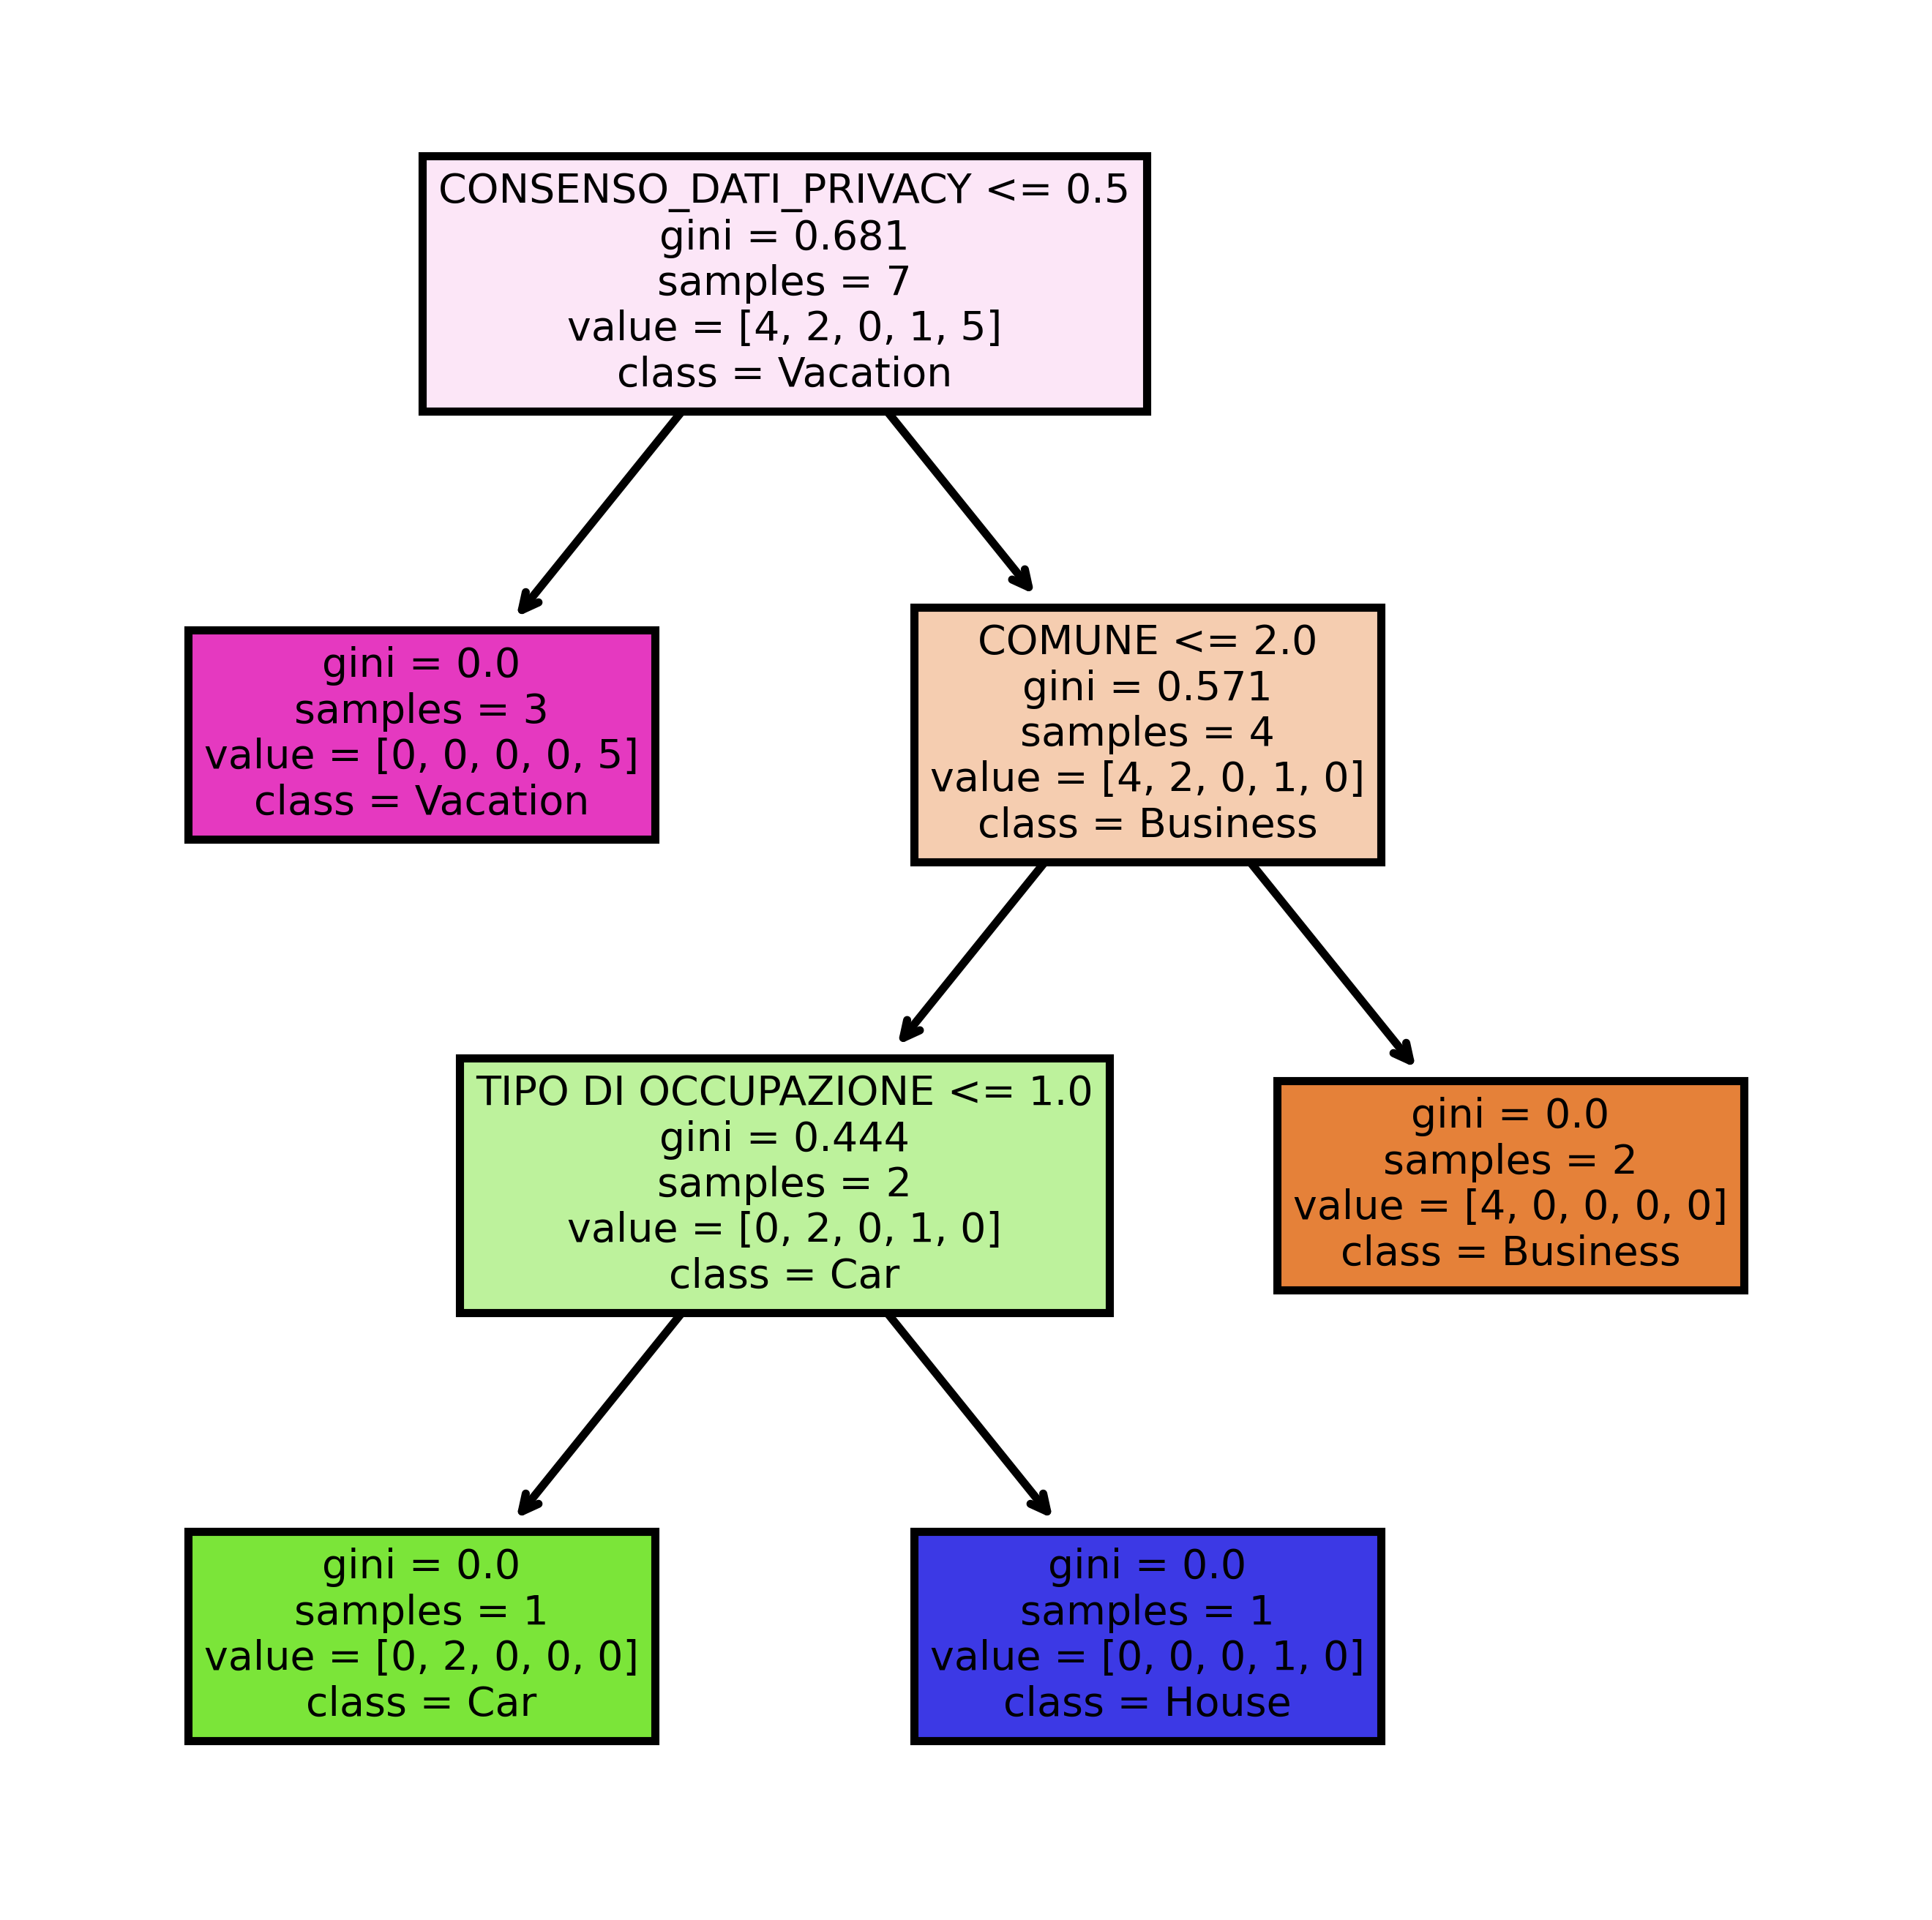

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Select one of the trees in the forest
selected_tree = clf.estimators_[0]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=800)
tree.plot_tree(selected_tree,
               feature_names=X.columns,
               class_names=encoders['MOTIVAZIONE_PRESTITO'].classes_,
               filled=True)
fig.savefig('rf_individualtree.png')

In [ ]:
import shap

# Create a TreeExplainer for the RandomForestClassifier
explainer = shap.TreeExplainer(clf)

# Calculate SHAP values for the first 100 instances in the training set
shap_values = explainer.shap_values(X_train[:100])

# Select the SHAP values for the first class
shap_values_class1 = shap_values[0]

# Plot the SHAP values for the first instance
shap.initjs()


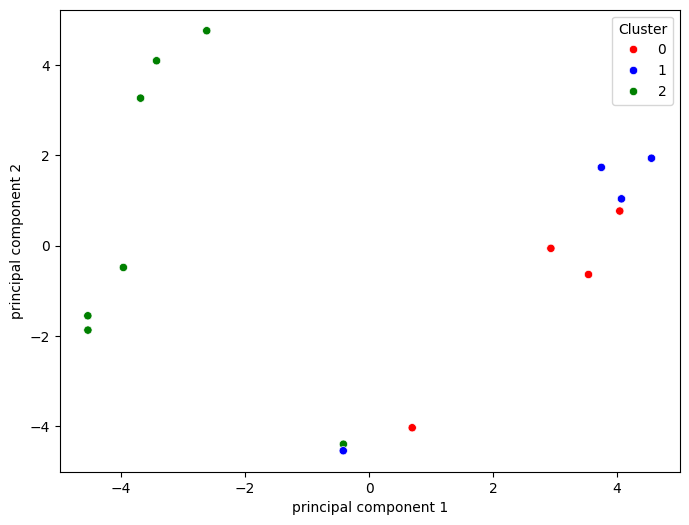

In [ ]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df, columns=['TIPO DI OCCUPAZIONE', 'PROVINCIA',
                            'SESSO', 'REGIONE', 'COMUNE', 'CAP', 'COMUNE_NASCITA', 'TIPO_AZIENDA'])

# Standardize the features to have mean=0 and variance=1
features_standardized = StandardScaler().fit_transform(df_encoded)

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_standardized)
principalDf = pd.DataFrame(data=principalComponents, columns=[
                           'principal component 1', 'principal component 2'])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(features_standardized)

# Add the cluster number to the principalDf
principalDf['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x="principal component 1", y="principal component 2",
                hue="Cluster", data=principalDf, palette=['red', 'blue', 'green'])
plt.show()

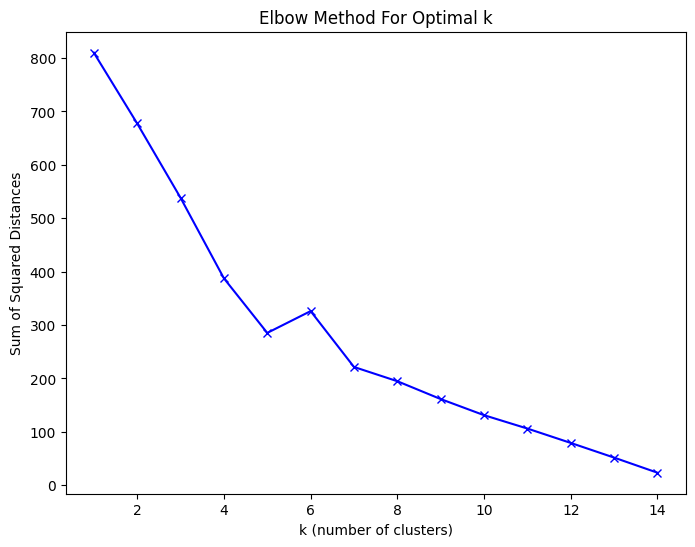

In [ ]:




# Calculate the sum of squared distances for different numbers of clusters
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(features_standardized)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the sum of squared distances
plt.figure(figsize=(8, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k (number of clusters)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

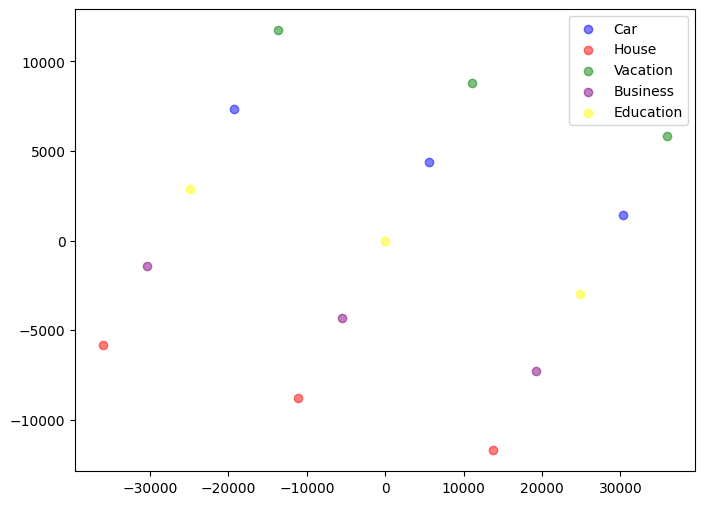

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Use PCA to reduce dimensionality so we can visualize the dataset on a 2D plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Convert to DataFrame
X_pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Concatenate the DataFrame with target labels
df_pca = pd.concat([X_pca_df, y], axis=1)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca.loc[df_pca['MOTIVAZIONE_PRESTITO'] == 0, 'PC1'],
            df_pca.loc[df_pca['MOTIVAZIONE_PRESTITO'] == 0, 'PC2'], color='blue', alpha=0.5, label='Car')
plt.scatter(df_pca.loc[df_pca['MOTIVAZIONE_PRESTITO'] == 1, 'PC1'],
            df_pca.loc[df_pca['MOTIVAZIONE_PRESTITO'] == 1, 'PC2'], color='red', alpha=0.5, label='House')
plt.scatter(df_pca.loc[df_pca['MOTIVAZIONE_PRESTITO'] == 2, 'PC1'],
            df_pca.loc[df_pca['MOTIVAZIONE_PRESTITO'] == 2, 'PC2'], color='green', alpha=0.5, label='Vacation')
plt.scatter(df_pca.loc[df_pca['MOTIVAZIONE_PRESTITO'] == 3, 'PC1'],
            df_pca.loc[df_pca['MOTIVAZIONE_PRESTITO'] == 3, 'PC2'], color='purple', alpha=0.5, label='Business')
plt.scatter(df_pca.loc[df_pca['MOTIVAZIONE_PRESTITO'] == 4, 'PC1'],
            df_pca.loc[df_pca['MOTIVAZIONE_PRESTITO'] == 4, 'PC2'], color='yellow', alpha=0.5, label='Education')
plt.legend()
plt.show()

In [ ]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(features_standardized)

# Convert the original data dictionary to a DataFrame
df_original = pd.DataFrame(data)

# Add the cluster assignments to the original DataFrame
df_original['Cluster'] = clusters

# Print the DataFrame with the cluster assignments
print(df_original)

       NOME   COGNOME  IMPORTO_RICHIESTO TIPO DI OCCUPAZIONE  PROVINCIA  \
0     Alice     Smith               5000            Employed  Province1   
1       Bob     Brown              10000       Self-employed  Province2   
2   Charlie     Davis              15000          Unemployed  Province3   
3     David    Wilson              20000            Employed  Province4   
4       Eve    Taylor              25000            Employed  Province5   
5     Frank  Anderson              30000       Self-employed  Province1   
6     Grace    Thomas              35000          Unemployed  Province2   
7    Hannah   Jackson              40000            Employed  Province3   
8       Ivy     White              45000       Self-employed  Province4   
9      Jack    Harris              50000          Unemployed  Province5   
10    Karen    Martin              55000            Employed  Province1   
11      Leo  Thompson              60000            Employed  Province2   
12     Mona    Garcia    

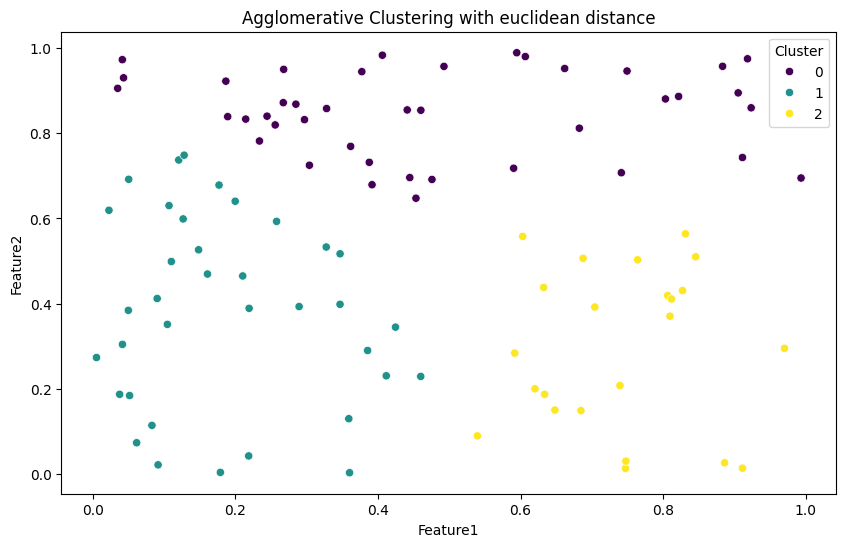

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100)
}
df = pd.DataFrame(data)

# Choose distance metric
metric = 'euclidean'  # Change this to 'manhattan', 'minkowski', etc. euclidean

# Perform Agglomerative Clustering
clustering = AgglomerativeClustering(
    n_clusters=3, metric=metric, linkage='ward')
labels = clustering.fit_predict(df)

# Add cluster labels to DataFrame
df['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Feature1', y='Feature2',
                hue='Cluster', palette='viridis')
plt.title('Agglomerative Clustering with {} distance'.format(metric))
plt.show()

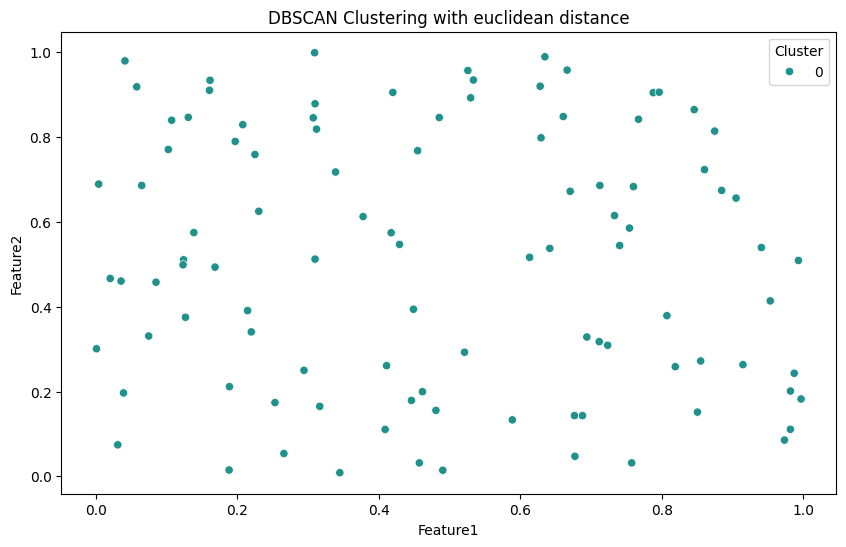

In [ ]:
from sklearn.cluster import DBSCAN

# Choose distance metric
metric = 'euclidean'  # Change this to 'euclidean', 'minkowski', etc. manhattan

# Perform DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5, metric=metric)
labels = dbscan.fit_predict(df)

# Add cluster labels to DataFrame
df['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Feature1', y='Feature2',
                hue='Cluster', palette='viridis')
plt.title('DBSCAN Clustering with {} distance'.format(metric))
plt.show()